<a href="https://colab.research.google.com/github/Lirgis0/project_yandex_I/blob/main/project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Предобработка данных

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Переименовываем колонки

In [ ]:
df = df.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 
                          'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                          'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Удаляем 2 пропущенных значения

In [ ]:
df = df[~df['name'].isna()].copy()





 Пропуски в столбцах с названиями и годом выхода игры, могут быть случайными пропусками, их количество невелико. Пропуски в отзывах могут быть связаны с тем, что у некоторых игр их просто нету или в этом дата сете или вообще. Так как это важные для оценки данные то мы не можем поставить вместо пропусков среднее или медиану, и будем проводить анализ только по тем строкам, в которых есть средняя оценка игры. 

 t.b.d.= to be defined. Это значит подлежит уточнению, тоесть данные еще уточняются, поэтому поставить заглушку и привести столбец к float. 

Про рейтинги ESRB - агенство открылось только в 1996 году, похоже что 16 лет до этого игры не оценивались. Так же те игры которые выпускались в Европе и Японии оценивались местными агенствами PEGI и CERO.
       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
df['year_of_release'].isna().mean()

0.016095255190570215

In [ ]:
df = df[~df['year_of_release'].isna()].copy()

Годы выпуска игр критически важная информация для нашего анализа, поэтому данные без них не будут иметь ценности для исследования, и так как таких пропусков ~1,5%, то я решил просто их удалить.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Поставим заглушку 333 вместо tbd

In [ ]:
df['user_score'] = df['user_score'].replace('tbd','333')
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


И поменяем тип данных

In [ ]:
df['user_score'] = df['user_score'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Поиск явных дубликатов:



In [ ]:
df.duplicated().sum()

0

Явных дубликатов не обнаружилось. Поиск неявных дубликатов:


In [ ]:
df['name'].nunique()

11426

Большое количество повторов в столбце названий, 11426 уникальных из 16444. 

In [ ]:
df.duplicated(subset = ['name','platform']).sum()

3

Дубликата всего 3, хотя очевидно это не полные дубликаты. Думаю,что удалить 3 строки из 16444 не будет ошибкой.

In [ ]:
df.drop_duplicates(subset = ['name', 'platform']).reset_index(drop = True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16436,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16437,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16438,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Добавим столбец с суммарными продажами

In [ ]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

В столбцах с названиями и годами выпуска было небольшое количество пропусков, их мы просто удалили, в отзывах критиках и пользователей большое количество пропусков, но с этим ничего не поделать пока оставляем так. В столбце с отзывами критиков я заменил 'tbd' на заглушку и привел столбец к вещественному типу. В столбце с рейтингом по возрастам большое количество пропусков вероятно связано с тем, что игры которые выходили до основания агенства не оценивались, а игры выпущенные в Европе и Японии оценивались собственными местными агенствами. 

В итоге из 16715 строк осталось 16441. 

# Исследовательский анализ данных

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Рассмотрим сколько игр выпускалось в разные годы.

In [ ]:
df.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

Верно будет сказать, что это количество релизов игр на разных платформах по годам. Тоесть выход каждой игры на каждой платформе это отдельное событие. Так как в этой части задания нам нужно оценить период актуальности данных: "Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?". То сколько релизов выпускалось в разные годы говорит нам что далеко не все данные важны для исследования, а точное определение срока актуальности, мы обнаружим дальше   

<function matplotlib.pyplot.show(close=None, block=None)>

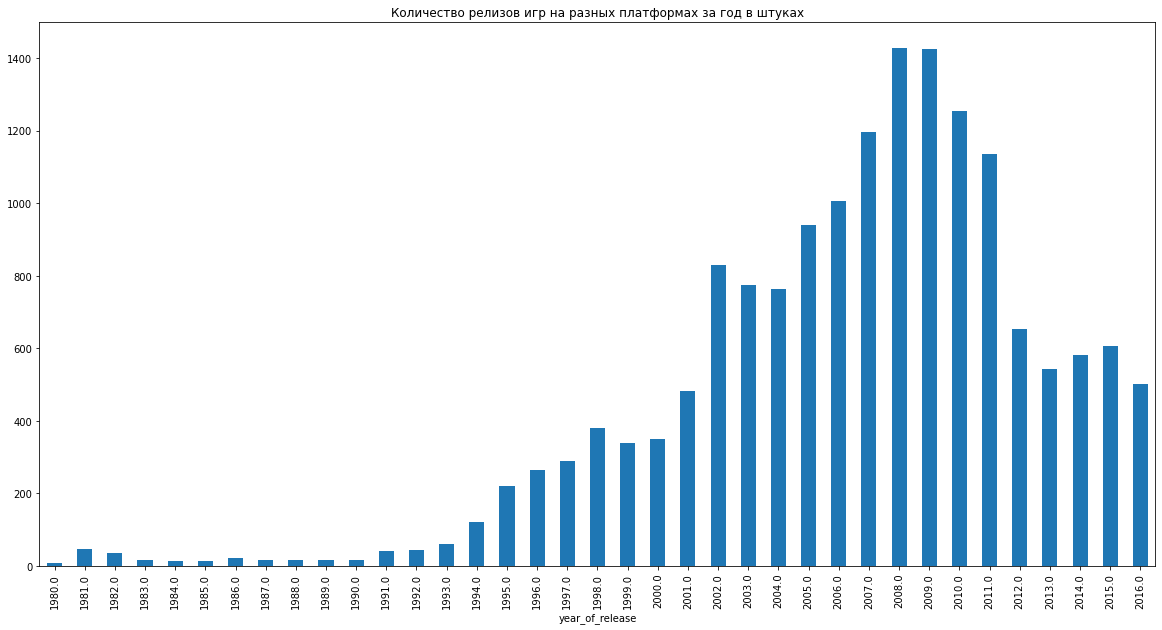

In [ ]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar', figsize=[20, 10])
plt.title('Количество релизов игр на разных платформах за год в штуках')
plt.show

Можно сказать, что бум релизов игра начался во второй половине 90-х, а в 2008 и 2009 году был пик релизов. 

Теперь рассмотрим, как менялись платформы для игр

In [ ]:
df.groupby('platform')['platform'].count().sort_values(ascending = False)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

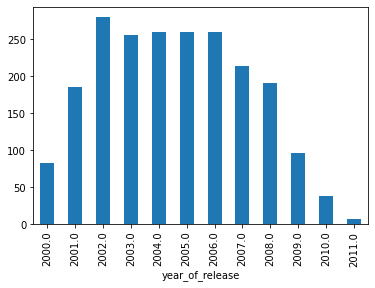

In [ ]:
df[df['platform'] == 'PS2'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

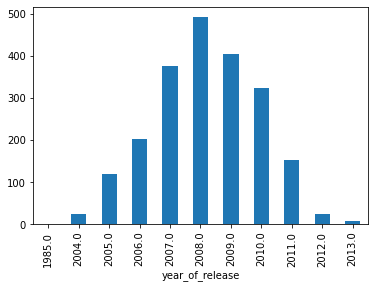

In [ ]:
df[df['platform'] == 'DS'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

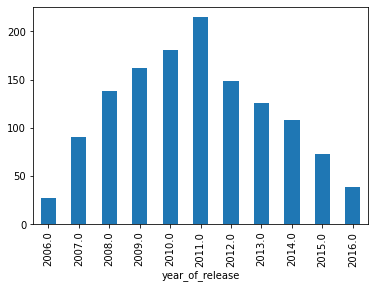

In [ ]:
df[df['platform'] == 'PS3'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

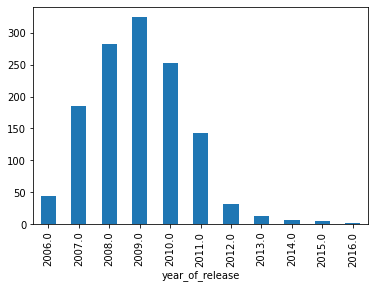

In [ ]:
df[df['platform'] == 'Wii'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

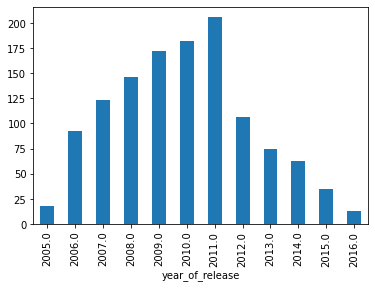

In [ ]:
df[df['platform'] == 'X360'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

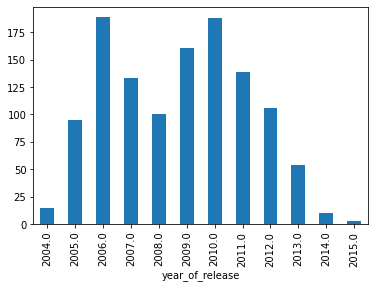

In [ ]:
df[df['platform'] == 'PSP'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

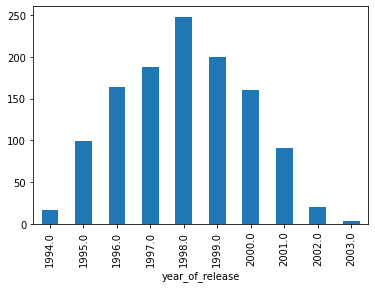

In [ ]:
df[df['platform'] == 'PS'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

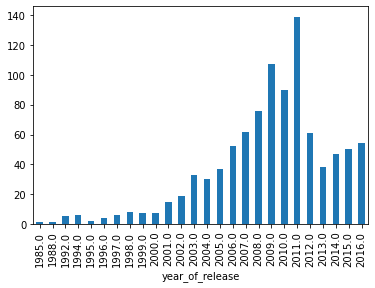

In [ ]:
df[df['platform'] == 'PC'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

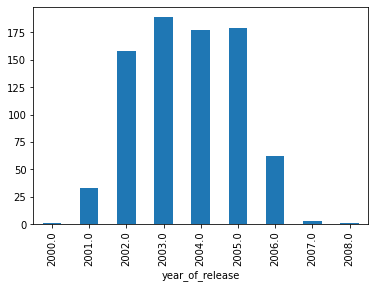

In [ ]:
df[df['platform'] == 'XB'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

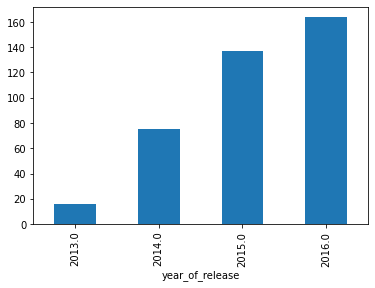

In [ ]:
df[df['platform'] == 'PS4'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

В среднем срок актуальности платформы ~8 лет, где то 3-4 года взлета и столько же падение. Значит учитывать данные за последние 4 года, для дальнейшего анализа - это хорошая идея =)

In [ ]:
df13_16 = df[df['year_of_release'] >= 2013]

In [ ]:
df13_16.groupby('platform')['year_of_release'].count().sort_values(ascending = False)

platform
PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: year_of_release, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

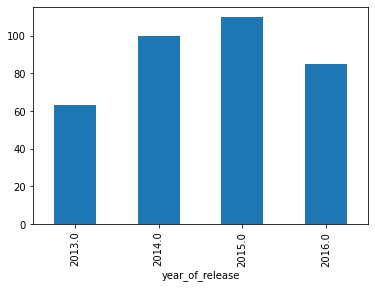

In [ ]:
df13_16[df13_16['platform'] == 'PSV'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

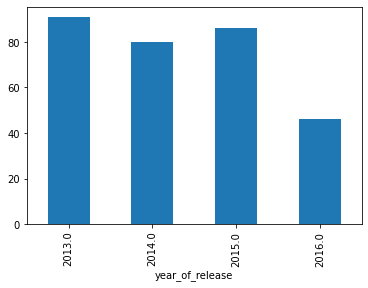

In [ ]:
df13_16[df13_16['platform'] == '3DS'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='year_of_release'>

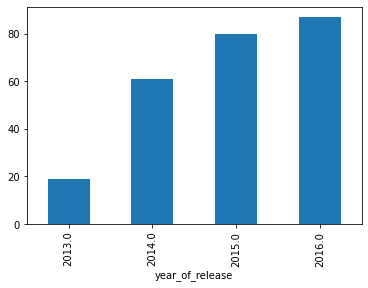

In [ ]:
df13_16[df13_16['platform'] == 'XOne'].groupby('year_of_release')['year_of_release'].count().plot(kind = 'bar')

Две перспективные растущие платформы: XOne и PS4.
Так же PC всегда актуален.

In [ ]:
df13_16['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [ ]:
t = [
     df13_16[df13_16['platform'] == 'PS3']['all_sales'],
     df13_16[df13_16['platform'] == 'X360']['all_sales'],
     df13_16[df13_16['platform'] == 'PS4']['all_sales'],
     df13_16[df13_16['platform'] == '3DS']['all_sales'],
     df13_16[df13_16['platform'] == 'XOne']['all_sales'],
     df13_16[df13_16['platform'] == 'WiiU']['all_sales'],
     df13_16[df13_16['platform'] == 'Wii']['all_sales'],
     df13_16[df13_16['platform'] == 'PC']['all_sales'],
     df13_16[df13_16['platform'] == 'PSV']['all_sales'],
     df13_16[df13_16['platform'] == 'DS']['all_sales'],
     df13_16[df13_16['platform'] == 'PSP']['all_sales'],
]

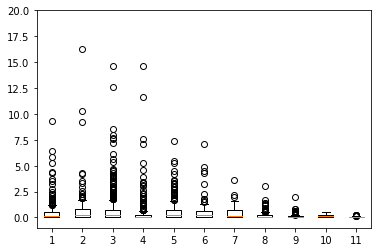

In [ ]:
plt.ylim(-1,20)
plt.boxplot(t)
plt.show()

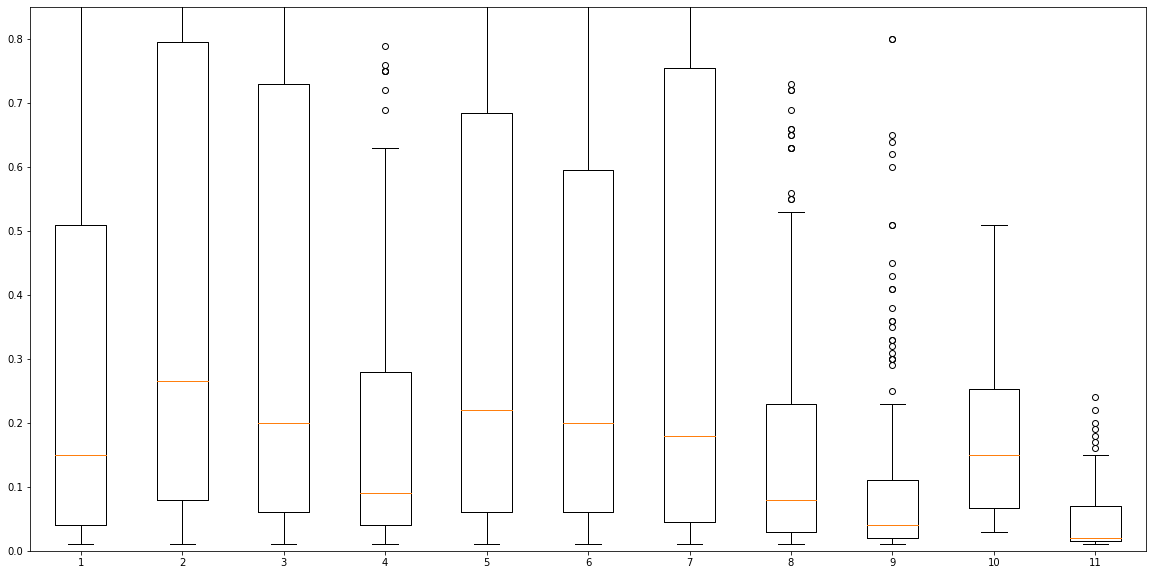

In [ ]:
plt.figure(figsize=(20, 10))
plt.ylim(0, 0.85)
plt.boxplot(t)
plt.show()

Из этих графиков можно увидеть, что у всех живых платформ, в основном игры продаются не более 1 млн копий. Но есть огромное количество игр продажи которых на всех платформах многократно превышают медианные продажи. Некоторые игры продавались тиражами в несколько десятков раз больше, чем медианная игра на этой платформе.

In [ ]:
df_top7 = df13_16[df13_16['platform'] != 'WiiU']
df_top7 = df_top7[df_top7['platform'] != 'PSP']
df_top7 = df_top7[df_top7['platform'] != 'Wii']
df_top7 = df_top7[df_top7['platform'] != 'DS']

Это наименее представленные платформы в датафрейме с 13 года, я решил взять 7 наиболее представленных платформ.

,critic_score,user_score,all_sales
critic_score,1.000000,-0.172596,0.334285
user_score,-0.172596,1.000000,-0.133733
all_sales,0.334285,-0.133733,1.000000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


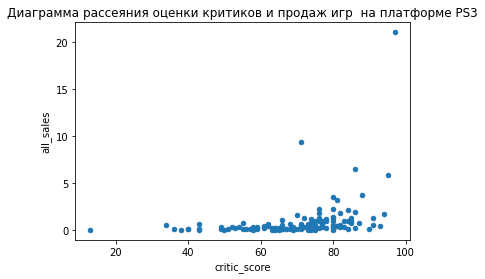

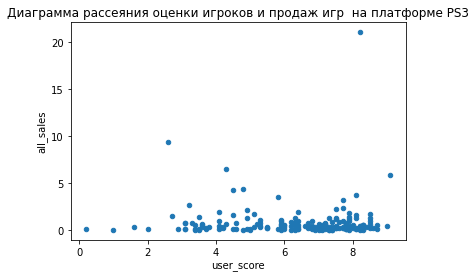

,critic_score,user_score,all_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.100095
all_sales,0.350345,-0.100095,1.000000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


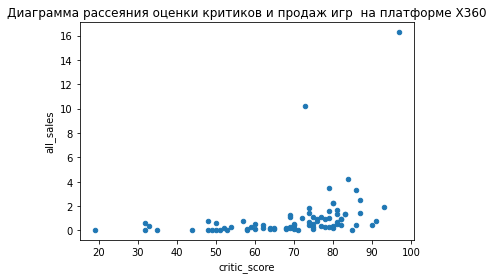

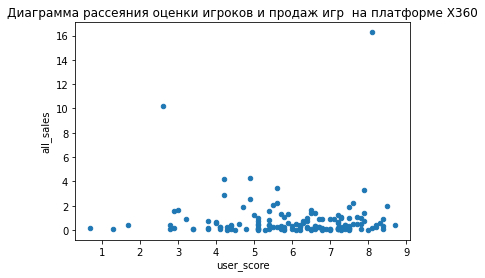

,critic_score,user_score,all_sales
critic_score,1.000000,0.012601,0.406568
user_score,0.012601,1.000000,-0.087008
all_sales,0.406568,-0.087008,1.000000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


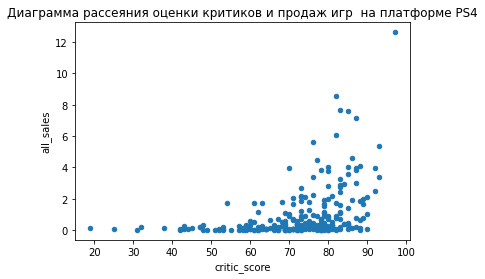

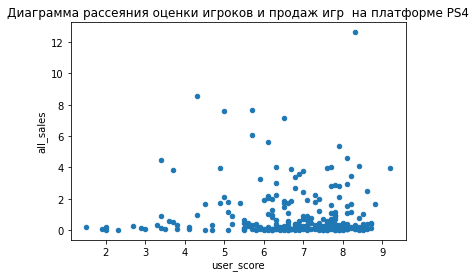

,critic_score,user_score,all_sales
critic_score,1.000000,-0.242819,0.357057
user_score,-0.242819,1.000000,-0.262377
all_sales,0.357057,-0.262377,1.000000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


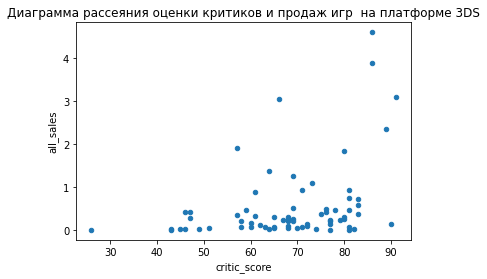

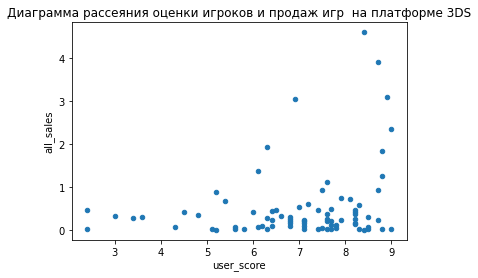

,critic_score,user_score,all_sales
critic_score,1.000000,-0.125103,0.416998
user_score,-0.125103,1.000000,-0.160802
all_sales,0.416998,-0.160802,1.000000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


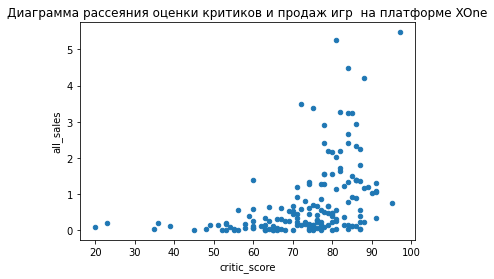

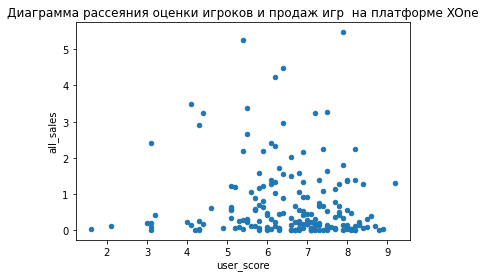

,critic_score,user_score,all_sales
critic_score,1.000000,0.429562,0.19603
user_score,0.429562,1.000000,-0.10262
all_sales,0.196030,-0.102620,1.00000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


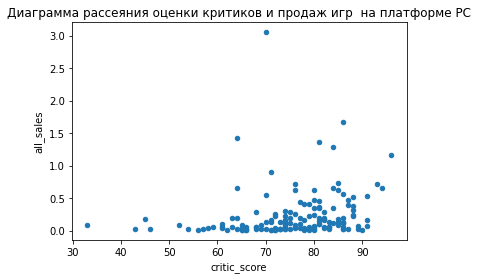

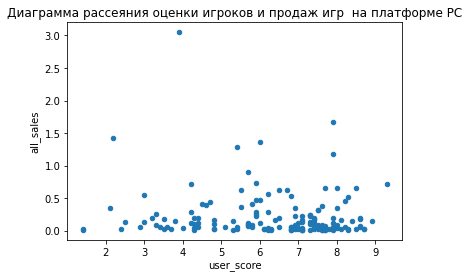

,critic_score,user_score,all_sales
critic_score,1.000000,-0.008750,0.254742
user_score,-0.008750,1.000000,-0.194195
all_sales,0.254742,-0.194195,1.000000


/tmp/ipykernel_456/1486076346.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')


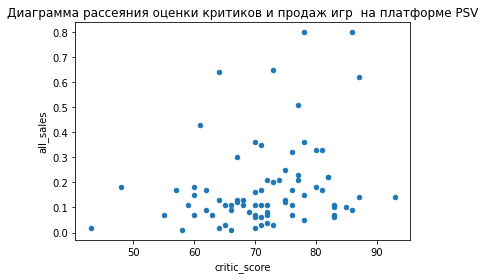

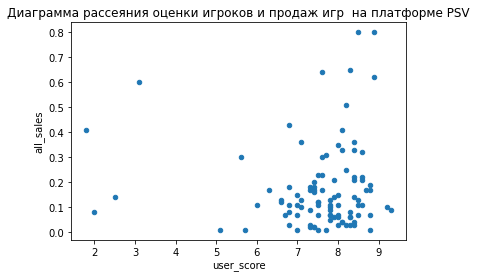

In [ ]:
for i in df_top7['platform'].unique():
  display(df_top7[df_top7['platform'] == i][['critic_score', 'user_score', 'all_sales']].corr())
  df_top7[df_top7['platform'] == i].plot(kind = 'scatter', x = 'critic_score', y = 'all_sales')
  plt.title('Диаграмма рассеяния оценки критиков и продаж игр  на платформе {}'.format(i))
  df_top7[(df_top7['platform'] == i) & (df['user_score'] < 33)].plot(kind = 'scatter', x = 'user_score', y = 'all_sales')
  plt.title('Диаграмма рассеяния оценки игроков и продаж игр  на платформе {}'.format(i))
  plt.show()

На основе анализа топ - 7 популярных и "живых" платформ:
Корреляция между продажами и отзывами критиков прослеживается, иногда она минимальна, но в общем можно сказать, что хорошие отзывы критиков чаще сопутствуют хорошим продажам. Чего нельзя сказать об отзывах игроков, тут во всех случаях корреляция отрицательныя. Это можно связать с тем, что игроки покупают больше расхваленые критиками и игры и ставят этим играм плохие оценки.

In [ ]:
df13_16['genre'].nunique()

12

<AxesSubplot:>

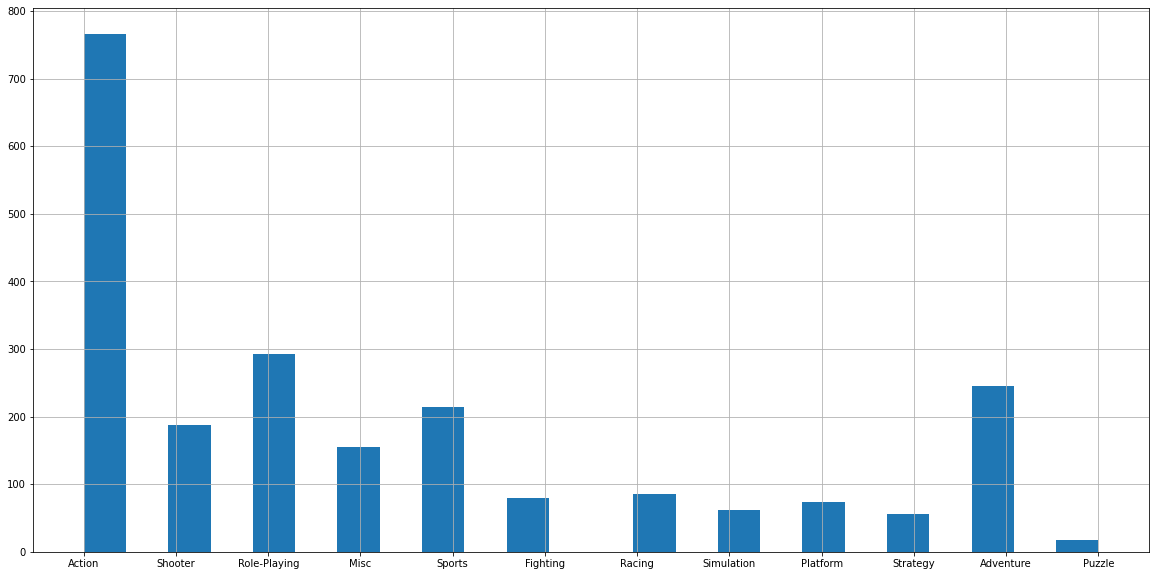

In [ ]:
df13_16['genre'].hist(figsize = (20, 10), bins = 24)

In [ ]:
df13_16.groupby('genre')['all_sales'].sum().sort_values()

genre
Puzzle            3.17
Strategy         10.08
Simulation       21.76
Adventure        23.64
Fighting         35.31
Racing           39.89
Platform         42.63
Misc             62.82
Role-Playing    145.89
Sports          150.65
Shooter         232.98
Action          321.87
Name: all_sales, dtype: float64

<AxesSubplot:title={'center':'Количество проданных копий в млн штук, за актуальный период'}, xlabel='genre'>

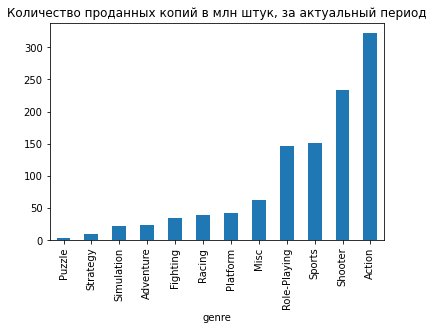

In [ ]:
df13_16.groupby('genre')['all_sales'].sum().sort_values().plot(
    kind = 'bar', title = 'Количество проданных копий в млн штук, за актуальный период'
)

Самый популярный жанр - экшн, почти 1750 млн копий игр этого жанра продано во всем мире с 1980 по 2016 годы. В тройке так же спортивные игры и стрелялки. Самые непопулярные жанры - стратегии, приключения и головоломки.

За актуальный период ситуация в топ - 5 немного изменилась, экшн так остался с отрывом на 1 месте, шутеры и спортивные поменялись местами, а на 5 место забрались misc.


<AxesSubplot:title={'center':'Количество проданных копий в млн штук, за актуальный период'}, xlabel='genre'>

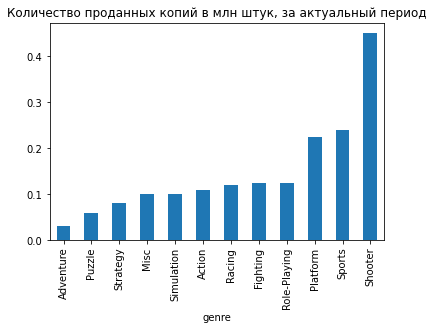

In [ ]:
df13_16.groupby('genre')['all_sales'].median().sort_values().plot(
    kind = 'bar', title = 'Количество проданных копий в млн штук, за актуальный период'
)

Медианная игра в жанре экшн даже не в топ-5 по продажам. Очевидно медианный шутер принесет больше продаж, так же в топ-3 платформеры и спортивные.

# Портрет пользователя каждого региона

**Северная Америка:**

In [ ]:
#Сортируем по платформам и суммам продаж игр для этих платформ в Северной Америке.
na_top = df13_16.pivot_table(index = ('platform'), values = ('na_sales'), aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False
).reset_index()
display(na_top)

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.11
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


In [ ]:
#Отбираем топ-5, платформы не вошедшие в топ-5 объединяем в "other".
t = ['WiiU', 'PC', 'Wii', 'PSV', 'DS', 'PSP']
def tru (j):
  if j in t:
    return 'other'
  else:
    return j

na_top['platform'] = na_top['platform'].apply(tru)
#Заново сортируем, уже с "other"
na_top = na_top.pivot_table(index = ('platform'), values = ('na_sales'), aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False
)
#создаем столбец с долями продаж
na_top['fraction'] = na_top['na_sales']/na_top['na_sales'].sum()
display(na_top)

,na_sales,fraction
platform,,
PS4,108.74,0.248429
XOne,93.12,0.212744
X360,81.66,0.186562
PS3,63.50,0.145073
other,52.49,0.119920
3DS,38.20,0.087272


<AxesSubplot:title={'center':'Количество продаж в Северной Америке в млн штук'}, xlabel='platform'>

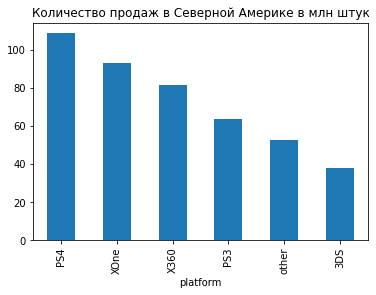

In [ ]:
na_top['na_sales'].plot(kind = 'bar', title = 'Количество продаж в Северной Америке в млн штук')

In [ ]:
df13_16.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head()

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [ ]:
df13_16.groupby('genre')['na_sales'].median().sort_values(ascending = False).head()

genre
Shooter     0.200
Platform    0.090
Sports      0.080
Fighting    0.045
Racing      0.030
Name: na_sales, dtype: float64

Типичный североамериканец будет играть на платформах PS4, XOne, X360, PS3 и 3DS в экшены, шутеры, спортивные, ролевые и misc игры.

***Европа:***

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,PC,25.36
6,WiiU,19.85
7,PSV,6.10
8,Wii,5.93
9,DS,0.85


,eu_sales,fraction
platform,,
PS4,141.09,0.359712
PS3,67.81,0.172883
other,58.26,0.148535
XOne,51.59,0.131530
X360,42.52,0.108406
3DS,30.96,0.078933


<AxesSubplot:ylabel='eu_sales'>

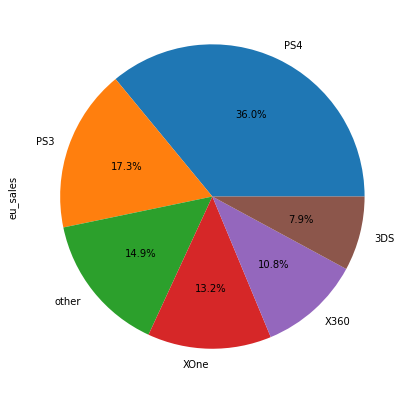

In [ ]:
eu_top = df13_16.pivot_table(index = ('platform'), values = ('eu_sales'), aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
display(eu_top)

t = ['WiiU', 'PC', 'Wii', 'PSV', 'DS', 'PSP']
def tru (j):
  if j in t:
    return 'other'
  else:
    return j

eu_top['platform'] = eu_top['platform'].apply(tru)

eu_top = eu_top.pivot_table(index = ('platform'), values = ('eu_sales'), aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False)     

eu_top['fraction'] = eu_top['eu_sales']/eu_top['eu_sales'].sum()

display(eu_top)

eu_top['eu_sales'].plot(kind = 'pie', autopct = '%1.1f%%',figsize = (7,7))

In [ ]:
df13_16.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head()

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Типичный Европеец, очень похож на типичного североамериканца, те же платформы и почти те же игры, только больше любит гонки, чем misc

***Япония:***

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,PSP,3.29
6,X360,0.51
7,XOne,0.34
8,Wii,0.05
9,DS,0.00


,jp_sales,fraction
platform,,
3DS,67.81,0.481674
PS3,23.35,0.165862
PSV,18.59,0.132050
PS4,15.96,0.113368
WiiU,10.88,0.077284
other,4.19,0.029763


<AxesSubplot:ylabel='jp_sales'>

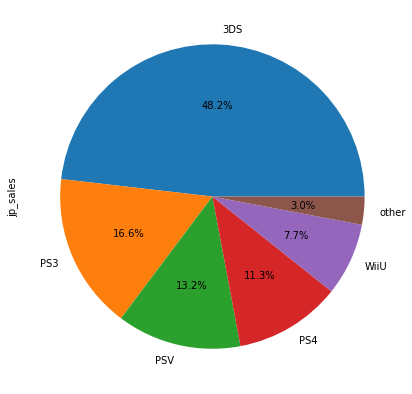

In [ ]:
jp_top = df13_16.pivot_table(index = ('platform'), values = ('jp_sales'), aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
display(jp_top)

t = ['PSP', 'X360', 'XOne', 'Wii', 'DS', 'PC']
def tru (j):
  if j in t:
    return 'other'
  else:
    return j

jp_top['platform'] = jp_top['platform'].apply(tru)

jp_top = jp_top.pivot_table(index = ('platform'), values = ('jp_sales'), aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)     

jp_top['fraction'] = jp_top['jp_sales']/jp_top['jp_sales'].sum()

display(jp_top)

jp_top['jp_sales'].plot(kind = 'pie', autopct = '%1.1f%%',figsize = (7,7))

In [ ]:
df13_16.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head()

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [ ]:
df13_16.groupby('genre')['jp_sales'].median().sort_values(ascending = False).head()

genre
Role-Playing    0.05
Fighting        0.03
Misc            0.02
Puzzle          0.02
Action          0.01
Name: jp_sales, dtype: float64

Типичный японец играет на платформах 3DS, PS3, PSV, PS4, WiiU в ролевые игры, экшн, misc, драки и шутеры. Причем платформа 3DS занимает ~48% рынка, тоесть почти половину, а ролевые игры ~51%, тоесть даже больше половины рынка. Ролевые игры и экшн занимают совокупно ~91% процент рынка. Все это разительно отличается от картины в Северной Америке и Европе.


***Влияние рейтингов:***

In [ ]:
df13_16.groupby('rating')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()

/tmp/ipykernel_456/3694139251.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df13_16.groupby('rating')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,79.05,83.36,15.14,22.61
E10+,54.24,42.69,5.89,12.57
M,165.21,145.32,14.11,47.04
T,49.79,41.95,20.59,14.29


In [ ]:
df13_16['rating'].isna().sum()

977

In [ ]:
df13_16['rating'] = df13_16['rating'].fillna('bez')

/tmp/ipykernel_456/3383513884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13_16['rating'] = df13_16['rating'].fillna('bez')


In [ ]:
df13_16.groupby('rating')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()

/tmp/ipykernel_456/3694139251.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df13_16.groupby('rating')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,79.05,83.36,15.14,22.61
E10+,54.24,42.69,5.89,12.57
M,165.21,145.32,14.11,47.04
T,49.79,41.95,20.59,14.29
bez,89.42,78.91,85.05,23.46


В Северной Америке, Европе и остальных странах кроме Японии лидируют по продажам игры с рейтингом "М", затем "Е". Игры с рейтингами "Е10+" и "Т" имеют почти одинаковые продажи и делят третье место, так же везде, кроме Японии.
В Японии же совершенно другая картина: самые продаваемые - "Т", дальше "Е" и "М", и замыкает рейтинг продаж "Е10+". Очевидно, что Япония сильно отличается  по предпочтениям не только жанров, но и рейтингов от всего остального мира. ТАкая вот японская специфика)

 Для остального мира все равно лидеры продаж - игры выпущенные в Северной Америке. И в Америке и в Европе игры без ретинга заняли 3 место, что так же говорит о схожести этих рынков. Ну и продажи в других регионах поменяли распределение, игры без рейтинга североамериканской конторы на втором месте по продажам, почти на равне с Е рейтингом.

Видимо японцы, больше уважают игры выпущенные не в Северной Америке, вероятно свои локальные японские игры, ведь их рынок очень спецефичен.

# **Гипотезы**

I

Н0 = Средний пользовательский рейтинг платформы Xbox One **равен** среднему пользовательскому рейтингу платформы PC.

Н1 = Средний пользовательский рейтинг платформы Xbox One **не равен** среднему пользовательскому рейтингу платформы PC.

In [ ]:

a = df13_16[(df13_16['platform'] == 'XOne') & (df['user_score'] < 33)]['user_score']
b = df13_16[(df13_16['platform'] == 'PC') & (df['user_score'] < 33)]['user_score']
alpha = 0.05
results = st.ttest_ind(a, b, equal_var = False)

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
  display("Отвергаем нулевую гипотезу")
else:
  display("Не получилось отвергнуть нулевую гипотезу") 

/tmp/ipykernel_456/2997808230.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df13_16[(df13_16['platform'] == 'XOne') & (df['user_score'] < 33)]['user_score']
/tmp/ipykernel_456/2997808230.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = df13_16[(df13_16['platform'] == 'PC') & (df['user_score'] < 33)]['user_score']


'p-значение:'

0.14759594013430463

'Не получилось отвергнуть нулевую гипотезу'

II

Н0 = Средний пользовательский рейтинг жанра Action **равен** среднему пользовательскому рейтингу жанра Sports.

Н1 = Средний пользовательский рейтинг жанра Action **не равен** среднему пользовательскому рейтингу жанра Sports.

In [ ]:
a = df13_16[(df13_16['genre'] == 'Action') & (df['user_score'] < 33)]['user_score']
b = df13_16[(df13_16['genre'] == 'Sports') & (df['user_score'] < 33)]['user_score']
alpha = 0.05
results = st.ttest_ind(a, b, equal_var = False)

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
  display("Отвергаем нулевую гипотезу")
else:
  display("Не получилось отвергнуть нулевую гипотезу")

/tmp/ipykernel_456/1708428862.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df13_16[(df13_16['genre'] == 'Action') & (df['user_score'] < 33)]['user_score']
/tmp/ipykernel_456/1708428862.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = df13_16[(df13_16['genre'] == 'Sports') & (df['user_score'] < 33)]['user_score']


'p-значение:'

1.4460039700704315e-20

'Отвергаем нулевую гипотезу'

# **Общий вывод:**

Мой прогноз прибыльной игры таков, если мы выпускаем игру не для Японии, то нужно выпускать шутер, для PS4 или Xone, с рейтингом М - это рейтинг «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Так же будет хорошей идеей выпуск спортивной игры на тех же платформах.
    Для японского рынка перспективным выглядит выпуск игры в жанрах Role-Playing или Fighting на платформе 3DS, но так как Xone и PS4 платформы находятся в стадии роста, выпуск на этих платформах был бы оправдан.    
    Конечно главной гарантией хороших продаж будет качестванная играи грамотная реклама, но эти рекомендации повысят шансы сделать максимально прибыльный проект